In [213]:
!pip install folium

In [490]:
#Download the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium as fm
%matplotlib inline

In [491]:
dataCO2 = pd.read_csv('C:\\Users\\Nishankur\\Downloads\\CO2.csv')
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,24.670529,24.505835,13.155542,8.351294,8.408363,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046060,0.053604,0.073765,0.074233,0.086292,0.101467,...,0.293837,0.412017,0.350371,0.315602,0.299445,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.097472,0.079038,0.201289,0.192535,0.201003,0.191528,...,1.243406,1.252789,1.330843,1.254617,1.291328,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,...,1.578574,1.803715,1.692908,1.749211,1.978763,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,6.122595,5.867130,5.916597,5.900753,5.832170,NaN,NaN,NaN,NaN,NaN


In [492]:
dataCO2.shape

(264, 64)

In [493]:
dataMeta = pd.read_csv('C:\\Users\\Nishankur\\Downloads\\MetadataCO2.csv')
dataMeta.tail()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
258,XKX,Europe & Central Asia,Lower middle income,Kosovo Agency of Statistics ; Source of popula...,Kosovo,NaN
259,YEM,Middle East & North Africa,Low income,Figures are based on MFMmod data ; Source of ...,"Yemen, Rep.",NaN
260,ZAF,Sub-Saharan Africa,Upper middle income,(see also: https://www.imf.org/en/News/Article...,South Africa,NaN
261,ZMB,Sub-Saharan Africa,Lower middle income,"Central Statistics Office Zambia, Bank of Zamb...",Zambia,NaN
262,ZWE,Sub-Saharan Africa,Low income,Zimstat- Central Statistics Agency ; Source of...,Zimbabwe,NaN


In [494]:
dataMeta.shape

(263, 6)

## Data Visualization and Pre-processing 

In [495]:
#Check whether the two tables are equal based on country code
dataCO2["Country Code"].sort_values().equals(dataMeta["Country Code"].sort_values())

False

In [497]:
#Drop the unnecessary columns
meta_data = dataMeta.drop(columns=["SpecialNotes","TableName","Unnamed: 5"])
meta_data

,Country Code,Region,IncomeGroup
0,ABW,Latin America & Caribbean,High income
1,AFG,South Asia,Low income
2,AGO,Sub-Saharan Africa,Lower middle income
3,ALB,Europe & Central Asia,Upper middle income
4,AND,Europe & Central Asia,High income
...,...,...,...
258,XKX,Europe & Central Asia,Lower middle income
259,YEM,Middle East & North Africa,Low income
260,ZAF,Sub-Saharan Africa,Upper middle income
261,ZMB,Sub-Saharan Africa,Lower middle income


In [498]:
#Merge the two tables based on country code
merged_data = dataCO2.merge(meta_data,on='Country Code',how='inner')
merged_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63,Region,IncomeGroup
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,13.155542,8.351294,8.408363,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,High income
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046060,0.053604,0.073765,0.074233,0.086292,0.101467,...,0.350371,0.315602,0.299445,NaN,NaN,NaN,NaN,NaN,South Asia,Low income
2,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.097472,0.079038,0.201289,0.192535,0.201003,0.191528,...,1.330843,1.254617,1.291328,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa,Lower middle income
3,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,...,1.692908,1.749211,1.978763,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,Upper middle income
4,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,5.916597,5.900753,5.832170,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,High income


In [265]:
#Drop the unnecessary columns
merged_data.drop(columns=["Indicator Name","Indicator Code","Unnamed: 63"],inplace=True)

In [266]:
merged_data

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,Region,IncomeGroup
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.505835,13.155542,8.351294,8.408363,NaN,NaN,NaN,NaN,Latin America & Caribbean,High income
1,Afghanistan,AFG,0.046060,0.053604,0.073765,0.074233,0.086292,0.101467,0.107637,0.123734,...,0.412017,0.350371,0.315602,0.299445,NaN,NaN,NaN,NaN,South Asia,Low income
2,Angola,AGO,0.097472,0.079038,0.201289,0.192535,0.201003,0.191528,0.246413,0.154912,...,1.252789,1.330843,1.254617,1.291328,NaN,NaN,NaN,NaN,Sub-Saharan Africa,Lower middle income
3,Albania,ALB,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,1.333055,1.363746,...,1.803715,1.692908,1.749211,1.978763,NaN,NaN,NaN,NaN,Europe & Central Asia,Upper middle income
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.867130,5.916597,5.900753,5.832170,NaN,NaN,NaN,NaN,Europe & Central Asia,High income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,Lower middle income
259,Yemen,YEM,0.702611,0.506779,0.726302,0.535971,0.655561,0.696540,0.602812,0.521386,...,0.810900,0.749447,0.996885,0.864835,NaN,NaN,NaN,NaN,Middle East & North Africa,Low income
260,South Africa,ZAF,5.610092,5.703690,5.747719,5.811157,6.163809,6.431587,6.265413,6.361646,...,9.004033,8.845033,8.673963,8.980119,NaN,NaN,NaN,NaN,Sub-Saharan Africa,Upper middle income
261,Zambia,ZMB,NaN,NaN,NaN,NaN,0.949422,1.099048,0.952613,1.263954,...,0.205911,0.249457,0.261113,0.288271,NaN,NaN,NaN,NaN,Sub-Saharan Africa,Lower middle income


In [267]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 262
Data columns (total 63 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  263 non-null    object 
 1   Country Code  263 non-null    object 
 2   1960          192 non-null    float64
 3   1961          193 non-null    float64
 4   1962          195 non-null    float64
 5   1963          196 non-null    float64
 6   1964          203 non-null    float64
 7   1965          203 non-null    float64
 8   1966          203 non-null    float64
 9   1967          203 non-null    float64
 10  1968          203 non-null    float64
 11  1969          203 non-null    float64
 12  1970          205 non-null    float64
 13  1971          206 non-null    float64
 14  1972          208 non-null    float64
 15  1973          208 non-null    float64
 16  1974          208 non-null    float64
 17  1975          208 non-null    float64
 18  1976          208 non-null    

In [268]:
#Drop the completely null columns
merged_data.drop(columns=['2015','2016','2017','2018'],inplace=True)
merged_data

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,Region,IncomeGroup
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.895574,26.230847,25.915833,24.670529,24.505835,13.155542,8.351294,8.408363,Latin America & Caribbean,High income
1,Afghanistan,AFG,0.046060,0.053604,0.073765,0.074233,0.086292,0.101467,0.107637,0.123734,...,0.085418,0.154101,0.241723,0.293837,0.412017,0.350371,0.315602,0.299445,South Asia,Low income
2,Angola,AGO,0.097472,0.079038,0.201289,0.192535,0.201003,0.191528,0.246413,0.154912,...,1.197844,1.181527,1.232495,1.243406,1.252789,1.330843,1.254617,1.291328,Sub-Saharan Africa,Lower middle income
3,Albania,ALB,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,1.333055,1.363746,...,1.322335,1.484311,1.495600,1.578574,1.803715,1.692908,1.749211,1.978763,Europe & Central Asia,Upper middle income
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.519466,6.427887,6.121652,6.122595,5.867130,5.916597,5.900753,5.832170,Europe & Central Asia,High income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,Lower middle income
259,Yemen,YEM,0.702611,0.506779,0.726302,0.535971,0.655561,0.696540,0.602812,0.521386,...,0.964139,0.999238,1.069059,0.992602,0.810900,0.749447,0.996885,0.864835,Middle East & North Africa,Low income
260,South Africa,ZAF,5.610092,5.703690,5.747719,5.811157,6.163809,6.431587,6.265413,6.361646,...,9.352665,9.854219,9.870597,9.190699,9.004033,8.845033,8.673963,8.980119,Sub-Saharan Africa,Upper middle income
261,Zambia,ZMB,NaN,NaN,NaN,NaN,0.949422,1.099048,0.952613,1.263954,...,0.151567,0.165936,0.186396,0.194337,0.205911,0.249457,0.261113,0.288271,Sub-Saharan Africa,Lower middle income


In [269]:
#Find mean of the available data based on region
regional_data = merged_data.groupby("Region").mean()
regional_data

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Region,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,1.608515,1.721642,1.576878,1.648614,2.056783,2.138748,2.273670,2.443996,2.645070,2.887656,...,4.284698,4.193676,4.489403,4.619757,4.639134,4.747072,4.883993,4.854815,4.971986,4.877791
Europe & Central Asia,5.404405,5.611780,5.816733,6.144573,6.380470,6.504912,6.721840,6.781412,7.363578,7.607177,...,7.389915,7.486593,7.364023,7.310422,6.718773,7.063697,6.913581,6.694324,6.657509,6.380394
Latin America & Caribbean,1.089019,1.183355,1.344248,1.124489,1.355891,1.500025,1.581418,1.832142,2.080927,2.335019,...,4.195551,4.343541,4.512289,4.515104,4.497739,4.544082,4.527896,5.524935,5.268932,5.300597
Middle East & North Africa,2.651291,3.234508,3.714822,8.831716,8.940695,9.346998,8.608915,8.254003,8.288172,13.077209,...,10.599762,10.774598,10.408202,10.361842,10.013079,9.877117,9.573147,10.033369,9.508551,10.435930
North America,10.107333,10.059212,10.176092,10.255598,11.132642,11.284071,11.670200,12.166263,12.647515,12.714531,...,15.310434,15.302312,15.773273,15.093574,13.460744,14.171050,13.163025,12.852657,12.695754,13.486104
South Asia,0.173259,0.179131,0.195659,0.205728,0.200606,0.216706,0.217240,0.225984,0.242379,0.250200,...,0.689240,0.753142,0.773741,0.819517,0.854618,0.888803,0.974760,1.032584,1.024552,1.139065
Sub-Saharan Africa,0.257318,0.258910,0.261777,0.262051,0.312275,0.340932,0.354771,0.386587,0.446574,0.452597,...,0.942955,0.955509,0.937590,0.949655,0.894152,0.891876,0.891257,0.894815,0.888698,0.946573


In [270]:
#Find mean of the available data based on income
income_data = merged_data.groupby("IncomeGroup").mean()
income_data

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
IncomeGroup,,,,,,,,,,,,,,,,,,,,,
High income,4.847923,5.293720,5.492923,7.174784,7.592069,7.877201,7.769964,7.717102,8.102956,10.060489,...,10.799352,10.928192,10.861162,10.740607,10.210136,10.388427,10.122972,10.401120,10.105086,10.155430
Low income,0.127518,0.117183,0.122915,0.121825,0.166101,0.177918,0.190456,0.169745,0.239793,0.233658,...,0.358343,0.364191,0.366435,0.369227,0.359882,0.370647,0.346485,0.326797,0.322842,0.332529
Lower middle income,0.245933,0.250267,0.294317,0.303341,0.360280,0.366086,0.399252,0.410946,0.445191,0.440439,...,1.059952,1.083291,1.132858,1.126114,1.113726,1.151819,1.261429,1.331792,1.387879,1.275340
Upper middle income,1.089438,1.094703,1.143343,1.167946,1.374892,1.471877,1.575818,1.939403,2.184297,2.371826,...,3.726312,3.831630,3.862042,4.010266,3.857344,4.015492,4.041368,4.079724,4.057428,4.074694


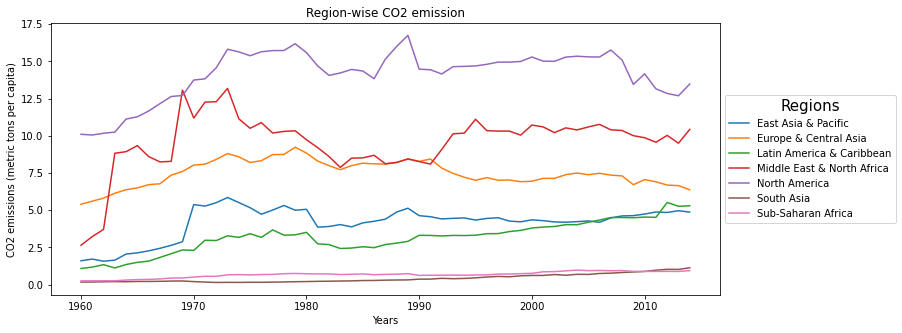

In [271]:
#Plot Region-wise CO2 emission graph
regional_data.T.plot(figsize=(12,5),title="Region-wise CO2 emission")
plt.xlabel("Years")
plt.ylabel("CO2 emissions (metric tons per capita)")
plt.legend(title='Regions',title_fontsize=15,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

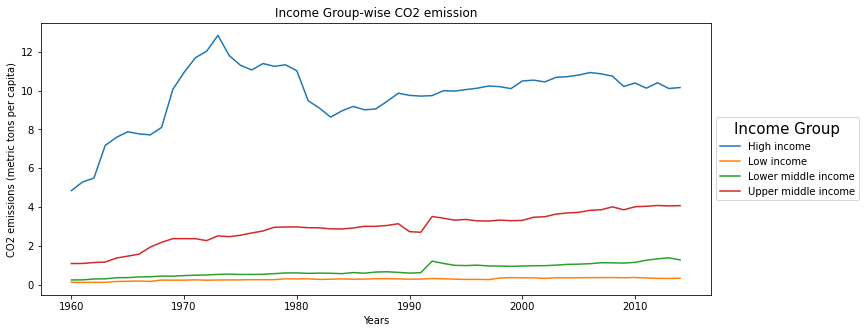

In [272]:
#Plot Income group-wise CO2 emission graph
income_data.T.plot(figsize=(12,5),title="Income Group-wise CO2 emission")
plt.xlabel("Years")
plt.ylabel("CO2 emissions (metric tons per capita)")
plt.legend(title='Income Group',title_fontsize=15,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [273]:
income_data.columns = list(map(int,income_data.columns))

In [309]:
income_data

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
IncomeGroup,,,,,,,,,,,,,,,,,,,,,
High income,4.847923,5.293720,5.492923,7.174784,7.592069,7.877201,7.769964,7.717102,8.102956,10.060489,...,10.799352,10.928192,10.861162,10.740607,10.210136,10.388427,10.122972,10.401120,10.105086,10.155430
Low income,0.127518,0.117183,0.122915,0.121825,0.166101,0.177918,0.190456,0.169745,0.239793,0.233658,...,0.358343,0.364191,0.366435,0.369227,0.359882,0.370647,0.346485,0.326797,0.322842,0.332529
Lower middle income,0.245933,0.250267,0.294317,0.303341,0.360280,0.366086,0.399252,0.410946,0.445191,0.440439,...,1.059952,1.083291,1.132858,1.126114,1.113726,1.151819,1.261429,1.331792,1.387879,1.275340
Upper middle income,1.089438,1.094703,1.143343,1.167946,1.374892,1.471877,1.575818,1.939403,2.184297,2.371826,...,3.726312,3.831630,3.862042,4.010266,3.857344,4.015492,4.041368,4.079724,4.057428,4.074694


In [300]:
max_ten = merged_data['2014'].sort_values(ascending=False).head(10).index.to_list()

[197, 49, 239, 124, 20, 6, 29, 202, 222, 141]

In [471]:
#Top ten countries emitting CO2 
top_ten = merged_data.loc[max_ten,['Country Name','Country Code','Region','IncomeGroup','2014']]
top_ten

,Country Name,Country Code,Region,IncomeGroup,2014
197,Qatar,QAT,Middle East & North Africa,High income,45.423240
49,Curacao,CUW,Latin America & Caribbean,High income,37.726289
239,Trinidad and Tobago,TTO,Latin America & Caribbean,High income,34.163243
124,Kuwait,KWT,Middle East & North Africa,High income,25.223864
20,Bahrain,BHR,Middle East & North Africa,High income,23.449755
6,United Arab Emirates,ARE,Middle East & North Africa,High income,23.302023
29,Brunei Darussalam,BRN,East Asia & Pacific,High income,22.124701
202,Saudi Arabia,SAU,Middle East & North Africa,High income,19.529272
222,Sint Maarten (Dutch part),SXM,Latin America & Caribbean,High income,19.461324
141,Luxembourg,LUX,Europe & Central Asia,High income,17.362121


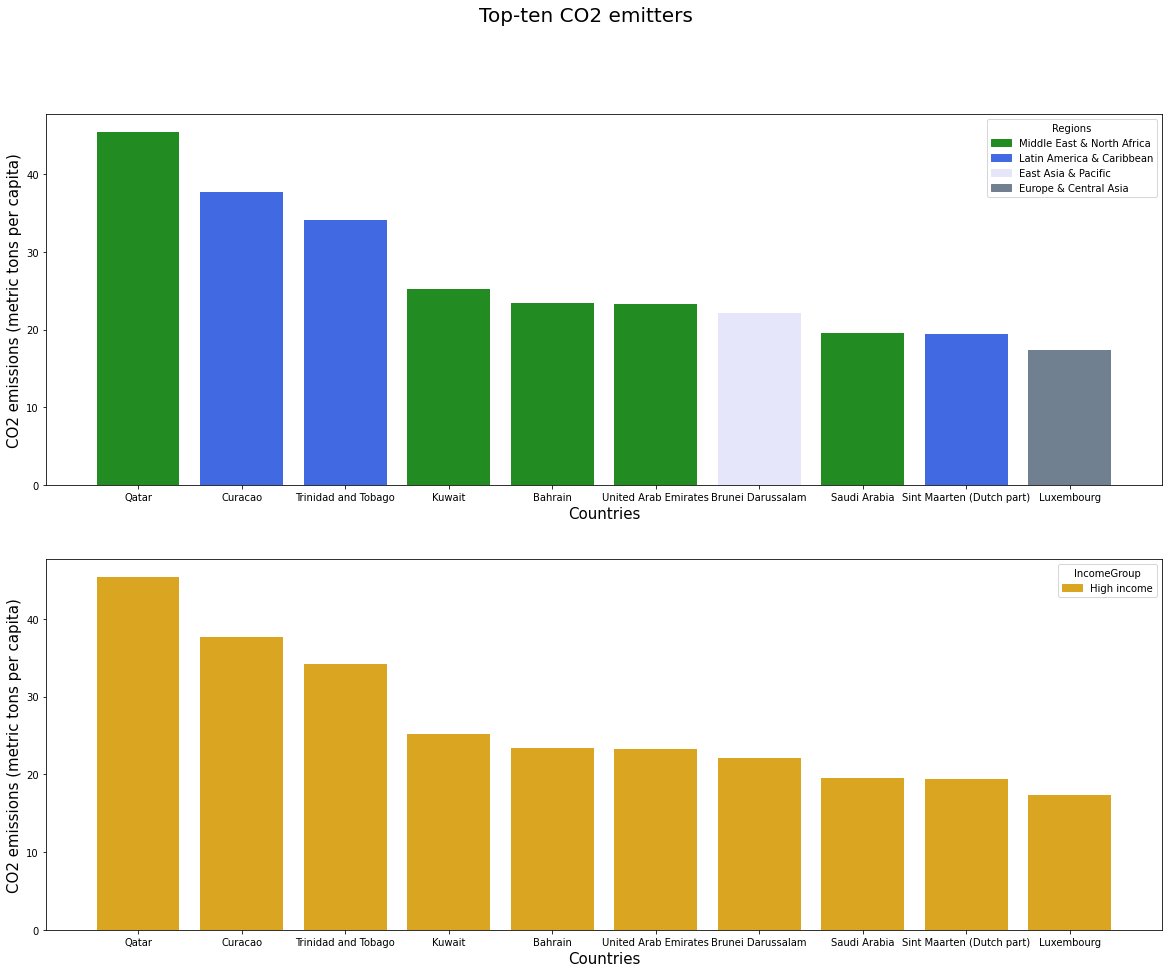

In [472]:
#Plot country vs emission graphs of top ten countires
fig,(ax1,ax2) = plt.subplots(2,1)
fig.set_figheight(15)
fig.set_figwidth(20)
fig.suptitle("Top-ten CO2 emitters",fontsize=20)
colors = {'Middle East & North Africa': 'forestgreen', 'Europe & Central Asia': 'slategrey', 'Latin America & Caribbean': 'royalblue', 'East Asia & Pacific':'lavender'}
colors1 = {'High income': 'goldenrod', 'Low income': 'cornsilk', 'Lower middle income': 'gold', 'Upper middle income':'khaki'}
ax1.bar(x='Country Name',height='2014',data=top_ten,color=[colors[i] for i in top_ten['Region']], )
ax2.bar(x='Country Name',height='2014',data=top_ten,color=[colors1[i] for i in top_ten['IncomeGroup']])
ax1.set_xlabel("Countries",fontsize=15)
ax1.set_ylabel("CO2 emissions (metric tons per capita)",fontsize=15)
ax2.set_xlabel("Countries",fontsize=15)
ax2.set_ylabel("CO2 emissions (metric tons per capita)",fontsize=15)
labels1 = top_ten['Region'].unique()
labels2 = top_ten['IncomeGroup'].unique()
handles1 = [plt.Rectangle((0,0),1,1, color=colors[l]) for l in labels1]
handles2 = [plt.Rectangle((0,0),1,1, color=colors1[l]) for l in labels2]
ax1.legend(handles1, labels1, title="Regions")
ax2.legend(handles2, labels2, title="IncomeGroup")
plt.show()



In [473]:
#Importing the necessary libraries for web scraping
import requests
import bs4
import lxml
file = requests.get('https://developers.google.com/public-data/docs/canonical/countries_csv')

In [474]:
soup = bs4.BeautifulSoup(file.text,'lxml')

In [475]:
#Finding the necessary latitudes and longitudes of the top ten countries
soup.select("table")

[<table>
 <tr>
 <th scope="col">country</th>
 <th scope="col">latitude</th>
 <th scope="col">longitude</th>
 <th scope="col">name</th>
 </tr>
 <tr>
 <td>AD</td>
 <td>42.546245</td>
 <td>1.601554</td>
 <td>Andorra</td>
 </tr>
 <tr>
 <td>AE</td>
 <td>23.424076</td>
 <td>53.847818</td>
 <td>United Arab Emirates</td>
 </tr>
 <tr>
 <td>AF</td>
 <td>33.93911</td>
 <td>67.709953</td>
 <td>Afghanistan</td>
 </tr>
 <tr>
 <td>AG</td>
 <td>17.060816</td>
 <td>-61.796428</td>
 <td>Antigua and Barbuda</td>
 </tr>
 <tr>
 <td>AI</td>
 <td>18.220554</td>
 <td>-63.068615</td>
 <td>Anguilla</td>
 </tr>
 <tr>
 <td>AL</td>
 <td>41.153332</td>
 <td>20.168331</td>
 <td>Albania</td>
 </tr>
 <tr>
 <td>AM</td>
 <td>40.069099</td>
 <td>45.038189</td>
 <td>Armenia</td>
 </tr>
 <tr>
 <td>AN</td>
 <td>12.226079</td>
 <td>-69.060087</td>
 <td>Netherlands Antilles</td>
 </tr>
 <tr>
 <td>AO</td>
 <td>-11.202692</td>
 <td>17.873887</td>
 <td>Angola</td>
 </tr>
 <tr>
 <td>AQ</td>
 <td>-75.250973</td>
 <td>-0.071389</td

In [476]:
soup.find_all('tr')

[<tr>
 <th scope="col">country</th>
 <th scope="col">latitude</th>
 <th scope="col">longitude</th>
 <th scope="col">name</th>
 </tr>,
 <tr>
 <td>AD</td>
 <td>42.546245</td>
 <td>1.601554</td>
 <td>Andorra</td>
 </tr>,
 <tr>
 <td>AE</td>
 <td>23.424076</td>
 <td>53.847818</td>
 <td>United Arab Emirates</td>
 </tr>,
 <tr>
 <td>AF</td>
 <td>33.93911</td>
 <td>67.709953</td>
 <td>Afghanistan</td>
 </tr>,
 <tr>
 <td>AG</td>
 <td>17.060816</td>
 <td>-61.796428</td>
 <td>Antigua and Barbuda</td>
 </tr>,
 <tr>
 <td>AI</td>
 <td>18.220554</td>
 <td>-63.068615</td>
 <td>Anguilla</td>
 </tr>,
 <tr>
 <td>AL</td>
 <td>41.153332</td>
 <td>20.168331</td>
 <td>Albania</td>
 </tr>,
 <tr>
 <td>AM</td>
 <td>40.069099</td>
 <td>45.038189</td>
 <td>Armenia</td>
 </tr>,
 <tr>
 <td>AN</td>
 <td>12.226079</td>
 <td>-69.060087</td>
 <td>Netherlands Antilles</td>
 </tr>,
 <tr>
 <td>AO</td>
 <td>-11.202692</td>
 <td>17.873887</td>
 <td>Angola</td>
 </tr>,
 <tr>
 <td>AQ</td>
 <td>-75.250973</td>
 <td>-0.071389</t

In [477]:
countrycode = []
latitude = []
longitude = []
country = []

In [478]:
row_list = soup.find_all('tr')
c = 0
for row in row_list:
    if c==0:
        c+=1
        continue
    col = row.find_all('td')
    countrycode.append(col[0].text)
    latitude.append(col[1].text)
    longitude.append(col[2].text)
    country.append(col[3].text)
    

In [479]:
print(len(country), len(countrycode), len(latitude), len(country), len(longitude))

245 245 245 245 245


In [480]:
#Saving the collected data to a dataframe
lat_long = pd.DataFrame({'cc':countrycode,'country':country,'lat':latitude,'long':longitude})
lat_long.head()

,cc,country,lat,long
0,AD,Andorra,42.546245,1.601554
1,AE,United Arab Emirates,23.424076,53.847818
2,AF,Afghanistan,33.93911,67.709953
3,AG,Antigua and Barbuda,17.060816,-61.796428
4,AI,Anguilla,18.220554,-63.068615


In [481]:
#Cleaning the collected data
top_ten.loc[top_ten[top_ten['Country Name']=='Brunei Darussalam'].index[0],'Country Name']='Brunei'

In [482]:
#Creating the final table and matching the lat and long to the countries
final_tab = top_ten.merge(lat_long,how = 'left',left_on='Country Name',right_on='country')
final_tab.drop(['country','cc'],inplace=True,axis=1)

In [483]:
missing = final_tab[final_tab['lat'].isnull()]['Country Name']
missing_list = missing.values
missing_list

array(['Curacao', 'Sint Maarten (Dutch part)'], dtype=object)

In [484]:
#Collecting the lat and long values of the missing countries and saving it against the respective countries 
coord = {'Curacao':(12.169570, -68.990021),'Sint Maarten (Dutch part)':(18.04248, -63.05483000000004)}

In [485]:
for key in coord:
    lat, long = coord[key]
    row = final_tab[final_tab['Country Name']==key].index[0]
    final_tab.loc[row,["lat"]] = lat
    final_tab.loc[row,["long"]] = long
final_tab
    

,Country Name,Country Code,Region,IncomeGroup,2014,lat,long
0,Qatar,QAT,Middle East & North Africa,High income,45.423240,25.354826,51.183884
1,Curacao,CUW,Latin America & Caribbean,High income,37.726289,12.16957,-68.990021
2,Trinidad and Tobago,TTO,Latin America & Caribbean,High income,34.163243,10.691803,-61.222503
3,Kuwait,KWT,Middle East & North Africa,High income,25.223864,29.31166,47.481766
4,Bahrain,BHR,Middle East & North Africa,High income,23.449755,25.930414,50.637772
5,United Arab Emirates,ARE,Middle East & North Africa,High income,23.302023,23.424076,53.847818
6,Brunei,BRN,East Asia & Pacific,High income,22.124701,4.535277,114.727669
7,Saudi Arabia,SAU,Middle East & North Africa,High income,19.529272,23.885942,45.079162
8,Sint Maarten (Dutch part),SXM,Latin America & Caribbean,High income,19.461324,18.04248,-63.05483
9,Luxembourg,LUX,Europe & Central Asia,High income,17.362121,49.815273,6.129583


In [486]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

In [488]:
#Plotting the top ten countries on the map
site_map = fm.Map(zoom_start=5)
location = final_tab[['lat', 'long','Country Name']].values.tolist()
for point in location:
    circle = fm.Circle([point[0],point[1]], radius=100, color='#d35400', fill=True).add_child(fm.Popup(point[2]))

    marker = fm.map.Marker(
            [point[0],point[1]],
    
            icon=DivIcon(
            icon_size=(20,20),
            icon_anchor=(0,0),
            html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % point[2],
            )
            )
    site_map.add_child(marker)
    site_map.add_child(circle)

site_map

# CO2 emission analysis(1960-2014):

1. The North American and Middle Eastern and North African countries are the highest avg. CO2 emitters with the South Asian and Sub-Saharan countries have the lowest avg. CO2 emission.
2. Also, the high income countries seemingly are the highest CO2 emitters whereas the low income countries are the lowest emitters.
3. Both the graphs show an increasing trend.
4. The avg. per capita CO2 emission of the higher incomes countries is much more than that of the other three groups. 
5. The top ten carbon emitters are also higher income coutries, according to the available data.(2014 data)
6. Among the top ten carbon emitters, Middle Eastern and North African countries have the highest count.(2014 data)